### Import modules

In [1]:
import read
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from pandas import crosstab

C:\Users\moham\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\moham\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\moham\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Create KMeans model function

In [2]:
def returnKMeansmodel(clusters):
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit(X_train.values, y_train.values)
    return kmeans

### Dataset: Seed

#### Data Set Information:

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


#### Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

### Read data

In [3]:
def process_data(path):
    data_path = f'../datasets/{path}.data'
    scheme_path = f'../datasets/{path}.names'
    data, attributes, value_type = read.read(data_path, scheme_path)
    return data , attributes , value_type

In [4]:
path = 'seeds'
data , attributes , value_type = process_data(path)

df = pd.DataFrame.from_records(data)
df.columns = attributes
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Split data into train and test

In [5]:
X = df.drop(df.columns[-1], axis=1)
Y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Elbow method to find best number of clusters

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. 

When we analyze the graph, we can see that the graph rapidly changes at a point of k=3 and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value of 3 corresponding to this point is the optimal K value or an optimal number of clusters.

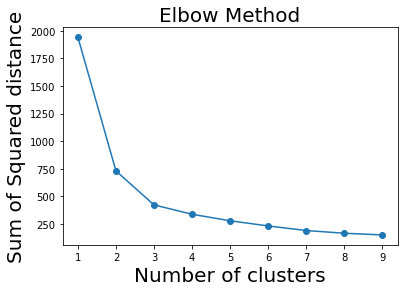

In [6]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_train.values, y_train.values)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Sum of Squared distance',fontsize=20)
plt.show()

### Predict the clusters for the test data

In [22]:
kmeans = returnKMeansmodel(3)
y_pred = kmeans.predict(X_test.values)

### Evaluation of the KMeans model on the test data

We can use a 'crosstab' to make a confusion matrix to show the clusters and the class the data point is of. We can calculate the accuracy by seeing the confusion matrix and taking the maximum amount for each row as correctly identified.

In [23]:
crosstab(np.array(y_test), np.array(y_pred), rownames=['label'], colnames=['cluster'])

cluster,0,1,2
label,,,
1,16,0,4
2,4,17,0
3,1,0,21


In [24]:
accuracy = (16+17+21)/len(y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.8571428571428571


### Visualize the clusters after dimensionality reduction(PCA)

In [25]:
pca = PCA(n_components=2)
pca.fit(X_test)

dfred = pca.transform(X_test)

finalDF = pd.DataFrame({'col 1': dfred[:, 0], 'col 2': dfred[:, 1], 'class': y_test})
finalDF.iloc[:, -1] = pd.factorize(finalDF.iloc[:, -1])[0]

finalDF.head()

,col 1,col 2,class
30,-1.331337,-2.980552,0
172,-3.903316,0.146958,1
84,5.467079,0.130422,2
199,-2.201096,-1.123967,1
60,-3.640567,-1.461342,0


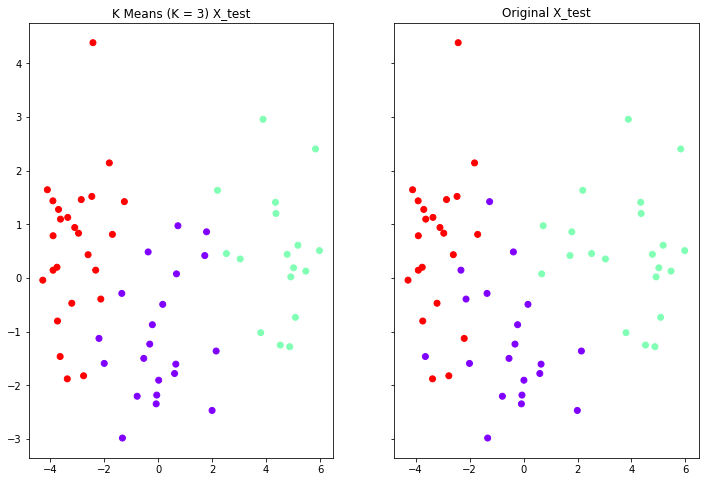

In [26]:
finalDF['klabels'] = y_pred+1

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize = (12,8) )

# For fitted with kmeans 
ax1.set_title('K Means (K = 3) X_test')
ax1.scatter(x = finalDF['col 1'], y = finalDF['col 2'], 
            c = finalDF['klabels'], cmap='rainbow')

# For original data 
ax2.set_title("Original X_test")
ax2.scatter(x = finalDF['col 1'], y = finalDF['col 2'], 
            c = y_test.astype(int), cmap='rainbow')

### Dataset: Forests

#### Data Set Information:

This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest.


#### Attribute Information:

1. Class: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)
2. b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates (Sept. 26, 2010; March 19, 2011; May 08, 2011.
3. pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9).
4. pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9).



### Read data

In [246]:
path = 'forest'
data , attributes , value_type = process_data(path)

In [247]:
df = pd.DataFrame.from_records(data)
df.columns = attributes

label_dict = {'d ': 1, 'h ': 2, 'o ': 3, 's ': 4}
df['class'] = df['class'].replace(label_dict)
df.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,class
0,67.0,51.0,68.0,115.0,69.0,111.0,136.0,31.0,67.0,47.70,...,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11,1
1,67.0,28.0,51.0,99.0,50.0,97.0,82.0,26.0,59.0,47.93,...,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57,4
2,63.0,26.0,50.0,95.0,49.0,91.0,81.0,26.0,57.0,53.09,...,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85,4
3,63.0,42.0,63.0,97.0,66.0,108.0,111.0,28.0,59.0,52.41,...,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52,1
4,46.0,27.0,50.0,83.0,51.0,90.0,76.0,26.0,56.0,68.54,...,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32,4


### Split data into train and test

In [248]:
X = df.drop(df.columns[-1], axis=1)
Y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Elbow method to find best number of clusters

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. 

When we analyze the graph, we can see that the graph rapidly changes at a point of k=4 and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value of 4 corresponding to this point is the optimal K value or an optimal number of clusters.

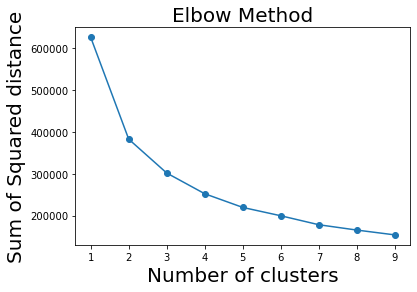

In [249]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_train.values, y_train.values)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Sum of Squared distance',fontsize=20)
plt.show()

### Predict the clusters for the test data

In [273]:
kmeans = returnKMeansmodel(4)
y_pred = kmeans.predict(X_test.values)

### Evaluation of the KMeans model on the test data

We can use a 'crosstab' to make a confusion matrix to show the clusters and the class the data point is of. We can calculate the accuracy by seeing the confusion matrix and taking the maximum amount for each row as correctly identified.

In [274]:
crosstab(np.array(y_test), np.array(y_pred), rownames=['label'], colnames=['cluster'])

cluster,0,1,2,3
label,,,,
1,13,13,2,0
2,0,1,0,12
3,3,2,7,0
4,0,40,0,5


In [275]:
accuracy = (13+40+7+12)/len(y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7346938775510204


### Visualize the clusters after dimensionality reduction(PCA)

In [276]:
pca = PCA(n_components=2)
pca.fit(X_test)

dfred = pca.transform(X_test)

finalDF = pd.DataFrame({'col 1': dfred[:, 0], 'col 2': dfred[:, 1], 'class': y_test})
finalDF.iloc[:, -1] = pd.factorize(finalDF.iloc[:, -1])[0]

finalDF.head()

,col 1,col 2,class
234,-35.034696,-23.365520,0
110,134.117559,-49.474350,1
248,-27.562715,-0.144119,2
9,20.922528,10.671368,0
93,-7.148004,7.711926,2


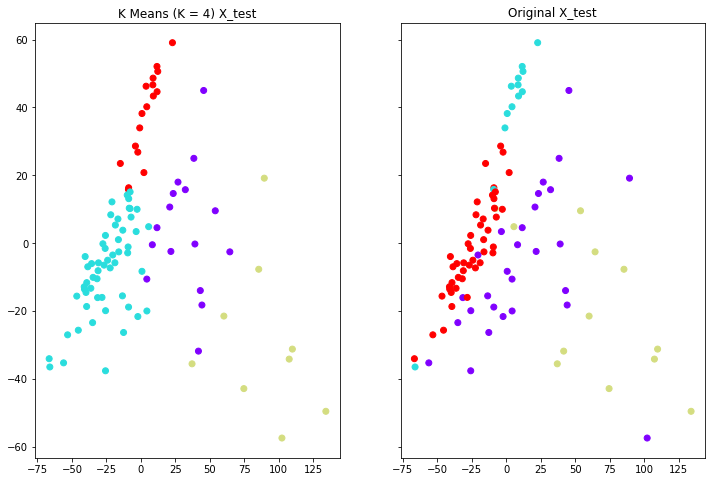

In [277]:
finalDF['klabels'] = y_pred+1

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize = (12,8) )

# For fitted with kmeans 
ax1.set_title('K Means (K = 4) X_test')
ax1.scatter(x = finalDF['col 1'], y = finalDF['col 2'], 
            c = finalDF['klabels'], cmap='rainbow')

# For original data 
ax2.set_title("Original X_test")
ax2.scatter(x = finalDF['col 1'], y = finalDF['col 2'], 
            c = y_test.astype(int), cmap='rainbow')